# A world made of words

At the end of the last session, we had imported some text into R in a tabular format, with each row corresponding to a unit of interest in our document. In this session we break the text into words and explore how word frequency is related to the balance between style and content, as well as some basic methods for classifying texts.

Now that we've had some experience processing documents from Project Gutenberg by hand, we can turn to a shortcut: the package `gutenbergr` automates the process of downloading documents by gutenberg ID and turning them into tibbles.

In [3]:
# only needed once
install.packages('gutenbergr')


The downloaded binary packages are in
	/var/folders/_k/nhmmjzg96r318bm9jvyvv7ph0000gn/T//RtmpY5eEtw/downloaded_packages


In [4]:
library(tidyverse)
library(tidytext)
library(gutenbergr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Let’s recap our work from last time, using gutenbergr. I'll use pipes to chain many of the steps together, but for readability it often helps to chunk your work into a couple of stages.

The Project Gutenberg ID for *Idylls of the King* is `610`.

In [19]:
king_lines <- gutenberg_download(610)

In [20]:
king_lines <- king_lines %>%
    mutate(
        is_break = str_starts(text, '      \\w'),
        section = cumsum(is_break)
    ) %>%
    filter(!is_break & text != '') %>%
    filter(section > 4) %>%
    mutate(section = section - 4)

In [21]:
king_lines <- king_lines %>%
    group_by(section) %>%
    mutate(line = row_number()) %>%
    ungroup() %>%
    select(section, line, text)

How does it look?

In [22]:
king_lines

section,line,text
<dbl>,<int>,<chr>
1,1,"These to His Memory—since he held them dear,"
1,2,Perchance as finding there unconsciously
1,3,"Some image of himself—I dedicate,"
1,4,"I dedicate, I consecrate with tears—"
1,5,These Idylls.
1,6,And indeed He seems to me
1,7,"Scarce other than my king’s ideal knight,"
1,8,“Who reverenced his conscience as his king;
1,9,"Whose glory was, redressing human wrong;"


## Breaking into words

The package **tidytext** contains tokenizers built for tibbles. Depending on your text, language, and application, you may prefer a more full-featured NLP package for tokenization. But for now we’ll try this approach.

In tidyr, **unnest** refers to spreading the contents of a list out into multiple rows. The `unnest_tokens()` function provided by tidytext first splits a string into **tokens**, i.e. component features of interest, and then unnests the result.

We’re going to start with word tokenization, but one nice thing about tidytext is its ability to do **ngrams**, something we'll check out a bit later.

We pass `unnest_tokens()` a couple of arguments:
- the new column we want to create
- the column containing the text to tokenize
- optionally, a string describing the kind of tokens we want, default: "words"

See `help(unnest_tokens)` for details.

In [24]:
king_words <- king_lines %>%
    unnest_tokens(word, text)

In [25]:
king_words

section,line,word
<dbl>,<int>,<chr>
1,1,these
1,1,to
1,1,his
1,1,memory
1,1,since
1,1,he
1,1,held
1,1,them
1,1,dear


### Basic tallying

Now that we have the text broken down into words, counting them is straightforward. Here are all the word counts, with the most common at the top:

In [28]:
wc <- king_words %>%
    group_by(word) %>%
    summarize(count=n()) %>%
    arrange(desc(count))

In [29]:
wc

word,count
<chr>,<int>
and,4621
the,4494
of,1903
a,1557
to,1556
in,1277
i,1248
that,970
his,946


### The Zipfian curve

We can see that the word frequencies drop off quickly. In the early 20th century, George Zipf described the apparent universality of this phenomenon, which has come to be called ["Zipf's Law"](https://en.wikipedia.org/wiki/Zipf%27s_law). In general, we expect the log of word frequency to decrease linearly with log of word rank.

Let's plot the fequencies with **ggplot2** to observe this. First, here are the raw counts—they drop off precipitously with rank:

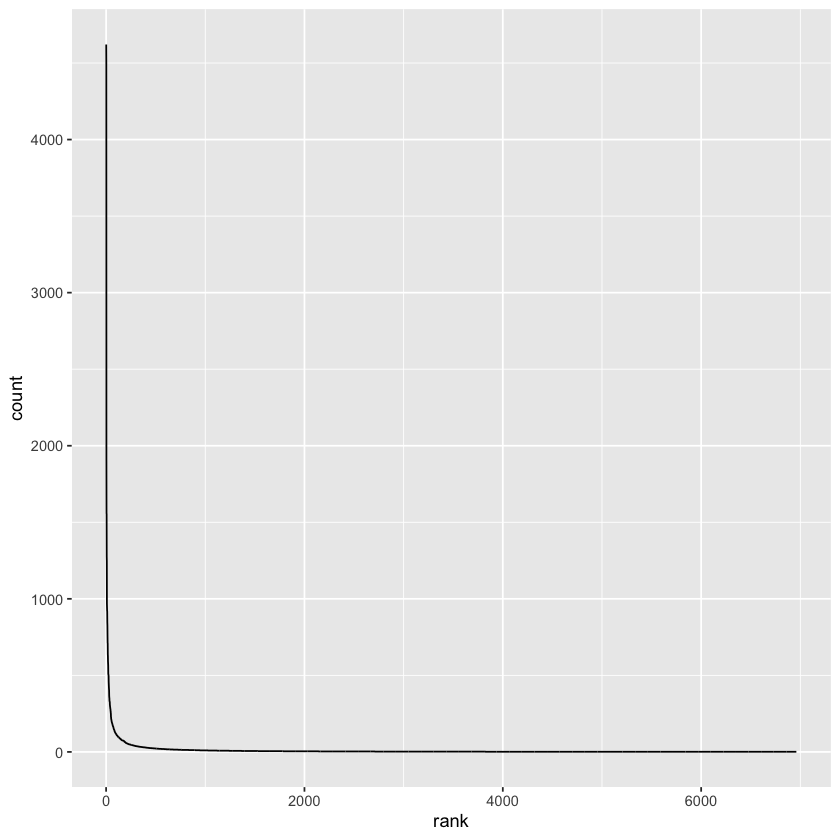

In [31]:
wc %>% 
    mutate(rank=row_number()) %>%
ggplot() +
    aes(x=rank, y=count) +
    geom_line()

Here they are again on a log-log plot:

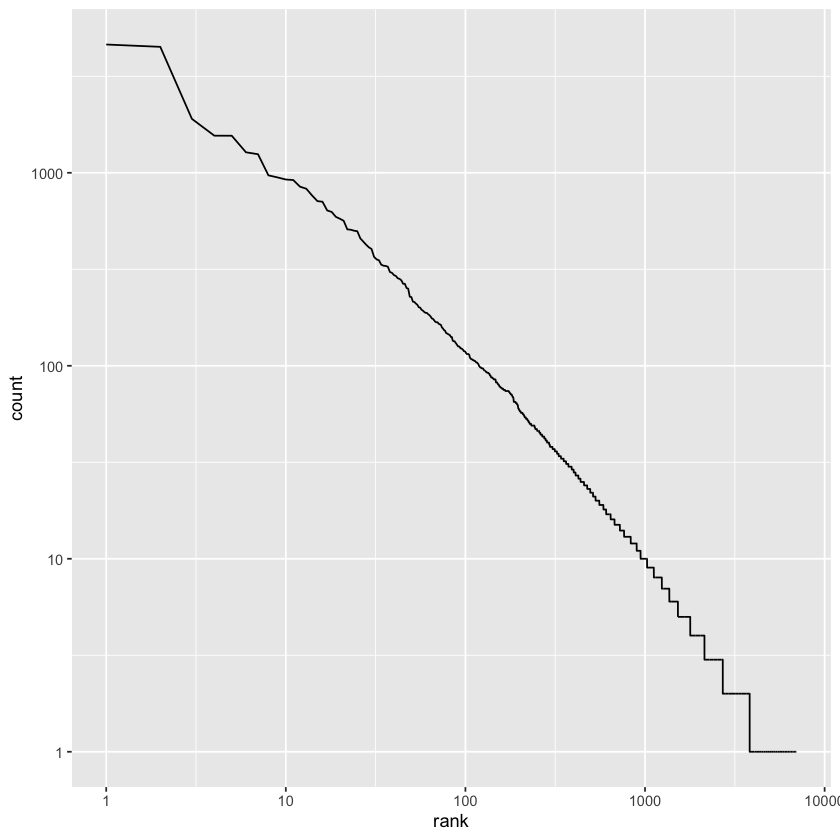

In [34]:
wc %>% 
    mutate(rank=row_number()) %>%
ggplot() +
    aes(x=rank, y=count) +
    geom_line() +
    scale_x_log10() +
    scale_y_log10()

### More on word frequency

So what are the top words in Tennyson's poems? They seem pretty bland...

In [37]:
head(wc)

word,count
<chr>,<int>
and,4621
the,4494
of,1903
a,1557
to,1556
in,1277


The **most frequent words** (MFWs) are almost exclusively **function words**, that is, words that are more related to how the language works than what the text is talking about (i.e. **content words**).

What you do with these words probably has a lot to do with what tasks you're interested in. The world of computational text analysis tends to be divided into those who prune MFWs before they even get started and those who, on the contrary, throw away everything else.

#### function words are useful for:
- authorship attribution
- stylometry
- some natural language processing

#### content words are useful for:
- information retrieval
- word vectors
- sentiment analysis

In general, analyses concerned with style have tended to favour MFWs (though sometimes with culling of the *top* most frequent words), while analyses concerned with content have tended to throw them away. Underlying this dichotomy is a more-or-less well-articulated assumption that *style and content are orthogonal*, or independent of each other.

So, for example, authorship attribution assumes that an author’s **stylistic fingerprint** is independent of what they’re writing about, and that an author might potentially write about any subject. If I really get to the essence of what makes J.K. Rowling’s language her own, then it should have nothing to do with wizards, but apply equally to detective novels, and perhaps even more diverse genres.

On the other hand, information retrieval assumes that all documents on a certain subject share certain properties regardless of who wrote them, and that a given subject might be written about in any style. A perfect model of the topic "baseball", for example, would match biographies of players, sports news articles, fiction, and maybe even "Casey at the Bat."

### Theoretical and practical considerations

I am personally opposed to these assumptions on ideological grounds: both style and content are transmitted in a single channel, the stream of language, and there is nothing to stop leakage between them. In my own field, Classical Epic, for example, there is much debate over whether the epithet in a phrase like "swift-footed Achilles" is style or content. Roman authors frequently played with the idea that style and content were intimately connected: Ovid, for example, says explicitly (if with tongue in cheek) in *Amores* 1.1 that he's incapable of writing about war in the elegiac metre.

For practical purposes, however, the division between style and content proves very useful. There isn't one firm threshold that separates function words from content, but rather each study involves some tuning to find the parameters that work best in context. Meanwhile, interest in the "middle" part of the frequency spectrum is increasing, and the dichotomy I described above was a bit overstated. You can, for example, see some cool visualizations of the effectiveness of various word-frequency windows for authorship using Stylo [here](https://doi.org/10.1093/llc/fqr031).

## From single texts to corpora

Let's consider how word counts scale as we add more texts. Let's compare selected children's novels by two authors from the turn of the last century, E. Nesbit and L.M. Montgomery.